In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation, real_data_loading_sce2
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

import tensorflow as tf

import os, time

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data loading
data_name = 'stock'
seq_len = 24
test_per = 0.05 # 5% observed data
observe_per = 0.50 # 5% of most recent 

if data_name in ['stock', 'energy']:
    train_data, test_data = real_data_loading_sce2(data_name, seq_len, test_per, observe_per)
else:
    print("Data Loading Wrong!!!!")
print(data_name + ' dataset is ready.')

stock dataset is ready.


In [4]:
np.array(train_data).shape, np.array(test_data).shape

((1726, 24, 6), (161, 24, 6))

In [5]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24 # 4 times of the data dimension
parameters['num_layer'] = 3
parameters['iterations'] = 5000
parameters['batch_size'] = 128

In [6]:
# Run TimeGAN
start = time.time()
generated_data = timegan(train_data, parameters)   
end = time.time()
print('Finish Synthetic Data Generation')
print(f"Runtime of the Generator is {end - start}")





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2021-08-19 02:23:02.584089: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-19 02:23:02.621820: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:af:00.0
2021-08-19 02:23:02.622009: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-19 02:23:02.623147: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-19 02:23:02.624296: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-19 02:23:02.624576: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-19 02:23:02.625960: I tensorflow/stream_executor/platfo

Start Embedding Network Training


2021-08-19 02:23:05.575826: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0


step: 0/5000, e_loss: 0.3208
step: 1000/5000, e_loss: 0.0244
step: 2000/5000, e_loss: 0.0203
step: 3000/5000, e_loss: 0.0103
step: 4000/5000, e_loss: 0.0089
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/5000, s_loss: 0.2408
step: 1000/5000, s_loss: 0.0248
step: 2000/5000, s_loss: 0.0186
step: 3000/5000, s_loss: 0.0225
step: 4000/5000, s_loss: 0.0187
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/5000, d_loss: 2.346, g_loss_u: 0.5142, g_loss_s: 0.0302, g_loss_v: 0.3305, e_loss_t0: 0.087
step: 1000/5000, d_loss: 1.674, g_loss_u: 0.8794, g_loss_s: 0.0272, g_loss_v: 0.0454, e_loss_t0: 0.0038
step: 2000/5000, d_loss: 1.7649, g_loss_u: 1.152, g_loss_s: 0.0233, g_loss_v: 0.0183, e_loss_t0: 0.0052
step: 3000/5000, d_loss: 1.8257, g_loss_u: 1.0073, g_loss_s: 0.0255, g_loss_v: 0.0183, e_loss_t0: 0.0049
step: 4000/5000, d_loss: 1.8686, g_loss_u: 0.7951, g_loss_s: 0.0254, g_loss_v: 0.0351, e_loss_t0: 0.004
Finish Joint Training
Finish Sy

In [7]:
filename = data_name + "_data_TimeGAN_5000_sce2-wTest-0-020.npy"
np.save(filename, generated_data)

In [8]:
generated_data.shape

(391802, 24, 6)

In [9]:
generated_data[0][0]

array([0.30880392, 0.30359957, 0.30993879, 0.30587286, 0.30603522,
       0.07100132])

In [10]:
metric_iteration = 5

predictive_score = list()
time_usage = list()
for tt in range(metric_iteration):
    start = time.time()
    temp_pred = predictive_score_metrics(test_data, generated_data)
    end = time.time()    
    predictive_score.append(temp_pred)   
    time_usage.append(end-start)

print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.



2021-08-19 03:53:34.754497: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:af:00.0
2021-08-19 03:53:34.754675: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-19 03:53:34.754708: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-19 03:53:34.754739: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-19 03:53:34.754771: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-19 03:53:34.754798: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10.0
2021-08-19 03:53:34.754828: I tensorflow/stream_executor

Predictive score: 0.1666


In [11]:
print("all the predictive scores: ", predictive_score)
print('Predictive score avg. value: ' + str(np.round(np.mean(predictive_score), 4)))
print('Predictive score std. value: ' + str(np.round(np.std(predictive_score), 4)))

#================Time calculation==========================#
print('Time usage avg. value: ' + str(np.round(np.mean(time_usage), 4)))
print('Time usage std. value: ' + str(np.round(np.std(time_usage), 4)))

all the predictive scores:  [0.1661677642521168, 0.16651319911187523, 0.1657877687957113, 0.16718085639508687, 0.16757783636507645]
Predictive score avg. value: 0.1666
Predictive score std. value: 0.0007
Time usage avg. value: 213.0089
Time usage std. value: 2.482


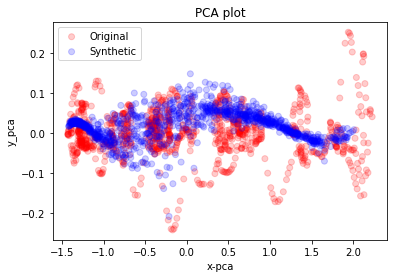

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.106s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.040369
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.299797
[t-SNE] KL divergence after 300 iterations: 0.660356


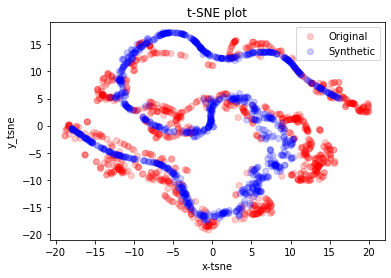

In [12]:
visualization(train_data, generated_data, 'pca')
visualization(train_data, generated_data, 'tsne')

In [13]:
!mv ./pca-results-stock-sce2-wTest-0-005-2.png ./figures_timegan_sce2_wTest
!mv ./tsne-results-stock-sce2-wTest-0-005-2.png ./figures_timegan_sce2_wTest

mv: cannot stat './pca-results-stock-sce2-wTest-0-005-2.png': No such file or directory
mv: cannot stat './tsne-results-stock-sce2-wTest-0-005-2.png': No such file or directory
